### Описание алгоритма

Алгоритм поиска кукушки может быть применен к широкому кругу задач оптимизации.

Алгоритм оптимизации с кукушкой (COA) используется для непрерывной нелинейной оптимизации.

Аналогично другим эволюционным подходам, COA начинается с исходной популяции. Основой алгоритма является стремление к выживанию. В процессе борьбы за выживание некоторые особи погибают. Выжившие кукушки мигрируют в более благоприятные места, где начинают размножаться и откладывать яйца. В конечном итоге выжившие кукушки сходятся таким образом, что формируется общество кукушек с сходными значениями приспособленности.

Резюмируя:
1. Каждая кукушка можеот откладывать одно яйцо за раз.
2. Лучшие гнезда с качественными яйцами передадутся будущим поколениям.
3. Фиксированное количество доступных гнезд.

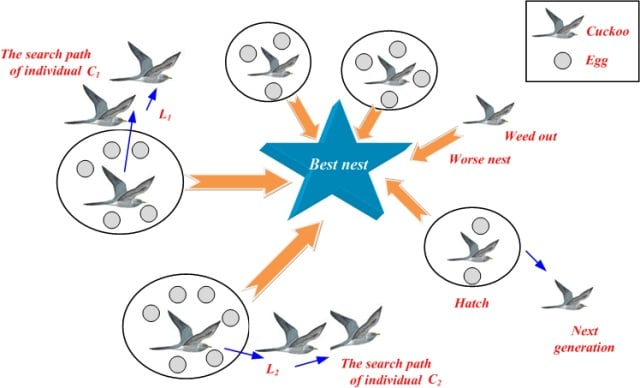

состояния для алгоритма:
1. Каждая кукушка откладывает по одному яйцу и сбрасывает его в случайно выбранное гнездо.
2. Лучшие гнезда с высоким качеством яиц будут переданы следующим поколениям.
3. Количество доступных гнезд фиксировано, и гнездо может обнаружить чужеродное яйцо с вероятностью pa. В этом случае птица - хозяин может либо выбросить яйцо, либо покинуть гнездо и яйцо погибнет.

# Cuckoo Search Algorithm:

Для каждой итерации g случайным образом выбирается яйцо кукушки i

 и генерируются новые решения `xi (g+ 1)`
с использованием полета Леви, своего рода случайного блуждания, в котором шаги определяются в границах длин шагов, которые имеют определенное распределение вероятностей, причем направления шагов изотропны и случайны.


Псевдокод алгоритма COA

1. Инициализация кукушек случайными значениями.
2. Определение приспособленности.
3. Кладка яиц в случайные гнёзда.
4. Опустошить гнездо с заданной вероятностью
5. Отправить кукушек от текущего положения в случайную сторону на расстояние полёта Леви
6. Определение приспособленности.
7. Кладка яиц в случайные гнёзда.
8. Опустошить гнездо с заданной вероятностью.
9. Повторить п.5 до выполнения критерия останова.







```
init f(x), X = f(x1, x2, x3);

while iterations:
    Get cuckoo randomly by Levy flights;
    Evaluate its quality fitness Fi;
    Choose a nest among n randomly;
    
    if Fi > Fj then:
      replace j by the new solution;
    end

    if A fraction (Pa) of worse nets are abandoned and new ones are built then
      Keep the best solutions
      Rank the solutions and find the current best
    end
end
```





Основные параметры алгоритма:

n: количество гнезд $X_i (i=1,2,3,4...n)$

$P_a$: вероятность нахождения яиц принесенных кукушкой и уничтожения их птицей-хозяином
Птица-хозяин обнаруживает яйцо кукушки с вероятностью $P_a  \in (0, 1)$

_Maxt_: Максимальное количество итераций

Based on three rules the cuckoo nest _i_, new generating solution for t iteration is given as:

$x^{t+1}_i = x^t_i + a Ø Levy (λ)$

Где:
(i=1,2,3,4...n)

$a$ - величина шага

λ - компонент Levy

Ø - entry wise multiplication

Levy Flight = Random Walk


## Levy Flights

Вероятностное распространение животных

$Levy(λ) = t^{-(λ)}$



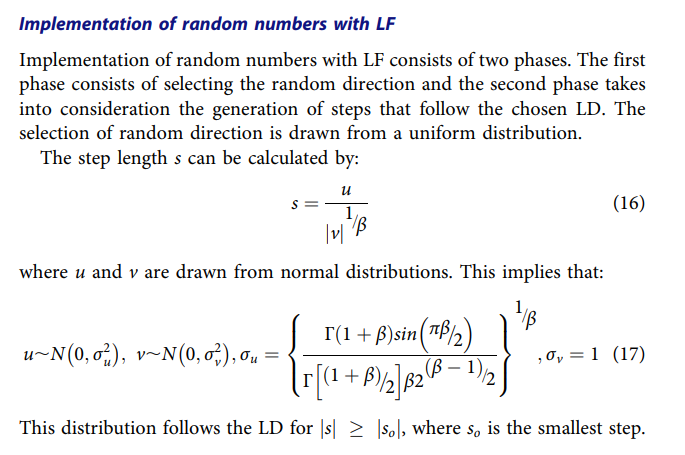

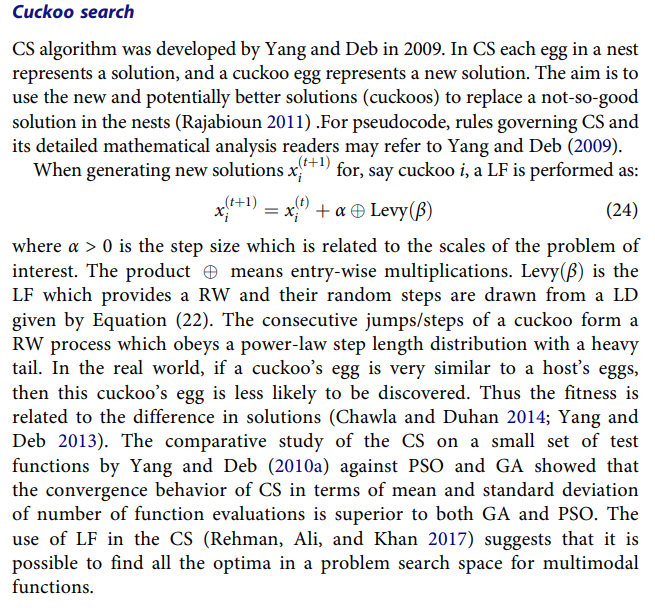

## Функции для оптимизации

Функция Химмельблау
$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7 )^2$

Функция Растригина $f(x) = An + \sum_{i+1}^n[x^2_i - A cos(2πx_i)]$
где A = 10
Функция Розенброка $f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x^2_i)^2+(x_i-1)^2]$

Функция "подставка для яиц" (Eggholder function) $f(x,y) = -(y + 47)sin \sqrt{|\frac{x}{2} + (y + 47)|} - xsin\sqrt{|x - (y + 47)|} $


In [ ]:
!pip install nbformat

4

In [1]:
import random
import networkx as nx
import numpy as np
import math
import datetime
import pandas as pd
import plotly.graph_objects as go

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

class CSO:

    def __init__(self, fitness, P=150, n=2, pa=0.25, beta=1.5, bound=None,
                plot=False, min=True, verbose=False, Tmax=300):

        '''

        PARAMETERS:

        fitness: A FUNCTION WHICH EVALUATES COST (OR THE FITNESS) VALUE

        P: POPULATION SIZE

        n: TOTAL DIMENSIONS

        pa: ASSIGNED PROBABILITY

        beta: LEVY PARAMETER

        bound: AXIS BOUND FOR EACH DIMENSION

        X: PARTICLE POSITION OF SHAPE (P,n)

        ################ EXAMPLE #####################

        If ith egg Xi = [x,y,z], n = 3, and if
        bound = [(-5,5),(-1,1),(0,5)]
        Then, x∈(-5,5); y∈(-1,1); z∈(0,5)

        ##############################################

        Tmax: MAXIMUM ITERATION

        best: GLOBAL BEST POSITION OF SHAPE (n,1)

        '''
        self.fitness = fitness
        self.P = P
        self.n = n
        self.Tmax = Tmax
        self.pa = pa
        self.beta = beta
        self.bound = bound
        self.plot = plot
        self.min = min
        self.verbose = verbose

        # X = (U-L)*rand + L (U AND L ARE UPPER AND LOWER BOUND OF X)
        # U AND L VARY BASED ON THE DIFFERENT DIMENSION OF X

        self.X = []

        if bound is not None:
            for (U, L) in bound:
                x = (U-L)*np.random.rand(P,) + L
                self.X.append(x)
            self.X = np.array(self.X).T
        else:
            self.X = np.random.randn(P, n)

    def flight(self):

        '''

        ACTION:

        TO CALCULATE THE CHANGE OF POSITION 'X = X + rand*C' USING LEVY FLIGHT METHOD

        C = 0.01*S*(X-best) WHERE S IS THE RANDOM STEP, and β = beta (TAKEN FROM [1])

              u
        S = -----
                1/β
             |v|

        beta = 1.5

        u ~ N(0,σu) # NORMAL DISTRIBUTION WITH ZERO MEAN AND 'σu' STANDARD DEVIATION

        v ~ N(0,σv) # NORMAL DISTRIBUTION WITH ZERO MEAN AND 'σv' STANDARD DEVIATION

        σv = 1

                     Γ(1+β)*sin(πβ/2)
        σu^β = --------------------------
                   Γ((1+β)/2)*β*(2^((β-1)/2))

        Γ IS THE GAMMA FUNCTION

        '''

        num = gamma(1+self.beta)*np.sin(np.pi*self.beta/2)
        den = gamma((1+self.beta)/2)*self.beta*(2**((self.beta-1)/2))
        σu = (num/den)**(1/self.beta)
        σv = 1
        u = np.random.normal(0, σu, self.n)
        v = np.random.normal(0, σv, self.n)
        S = u/(np.abs(v)**(1/self.beta))

        # DEFINING GLOBAL BEST SOLUTION BASED ON FITNESS VALUE

        for i in range(self.P):
            if i==0:
                self.best = self.X[i,:].copy()
            else:
                self.best = self.optimum(self.best, self.X[i,:])

        Xnew = self.X.copy()
        for i in range(self.P):
            Xnew[i,:] += np.random.randn(self.n)*0.01*S*(Xnew[i,:]-self.best)
            self.X[i,:] = self.optimum(Xnew[i,:], self.X[i,:])

    def layEggs(self):

        '''

        ACTION:

        TO REPLACE SOME NEST WITH NEW SOLUTIONS

        HOST BIRD CAN THROW EGG AWAY (ABANDON THE NEST) WITH FRACTION

        pa ∈ [0,1] (ALSO CALLED ASSIGNED PROBABILITY) AND BUILD A COMPLETELY

        NEW NEST. FIRST WE CHOOSE A RANDOM NUMBER r ∈ [0,1] AND IF r < pa,

        THEN 'X' IS SELECTED AND MODIFIED ELSE IT IS KEPT AS IT IS.

        '''

        Xnew = self.X.copy()
        Xold = self.X.copy()
        for i in range(self.P):
            d1,d2 = np.random.randint(0,5,2)
            for j in range(self.n):
                r = np.random.rand()
                if r < self.pa:
                    Xnew[i,j] += np.random.rand()*(Xold[d1,j]-Xold[d2,j])
            self.X[i,:] = self.optimum(Xnew[i,:], self.X[i,:])

    def optimum(self, best, particle_x):

        '''

        PARAMETERS:

        best: GLOBAL BEST SOLUTION 'best'

        particle_x: PARTICLE POSITION

        ACTION:

        COMPARE PARTICLE'S CURRENT POSITION WITH GLOBAL BEST POSITION

            1. IF PROBLEM IS MINIMIZATION (min=TRUE), THEN CHECKS WHETHER FITNESS VALUE OF 'best'

            IS LESS THAN THE FITNESS VALUE OF 'particle_x' AND IF IT IS GREATER, THEN IT

            SUBSTITUTES THE CURRENT PARTICLE POSITION AS THE BEST (GLOBAL) SOLUTION

            2. IF PROBLEM IS MAXIMIZATION (min=FALSE), THEN CHECKS WHETHER FITNESS VALUE OF 'best'

            IS GREATER THAN THE FITNESS VALUE OF 'particle_x' AND IF IT IS LESS, THEN IT

            SUBSTITUTES THE CURRENT PARTICLE POSITION AS THE BEST (GLOBAL) SOLUTION

        '''

        if self.min:
            if self.fitness(best) > self.fitness(particle_x):
                best = particle_x.copy()
        else:
            if self.fitness(best) < self.fitness(particle_x):
                best = particle_x.copy()
        return best

    def clip_X(self):

        # IF BOUND IS SPECIFIED THEN CLIP 'X' VALUES SO THAT THEY ARE IN THE SPECIFIED RANGE

        if self.bound is not None:
            for i in range(self.n):
                xmin, xmax = self.bound[i]
                self.X[:,i] = np.clip(self.X[:,i], xmin, xmax)

    def execute(self):

        '''

        PARAMETERS:

        t: ITERATION NUMBER

        fitness_time: LIST STORING FITNESS (OR COST) VALUE FOR EACH ITERATION

        time: LIST STORING ITERATION NUMBER ([0,1,2,...])

        ACTION:

        AS THE NAME SUGGESTS, THIS FUNCTION EXECUTES CUCKOO SEARCH ALGORITHM

        BASED ON THE TYPE OF PROBLEM (MAXIMIZATION OR MINIMIZATION).

        NOTE: THIS FUNCTION PRINTS THE GLOBAL FITNESS VALUE FOR EACH ITERATION

        IF THE VERBOSE IS TRUE

        '''

        self.fitness_time, self.time = [], []

        for t in range(self.Tmax):
            self.flight()
            self.clip_X()
            self.layEggs()
            self.clip_X()
            self.fitness_time.append(self.fitness(self.best))
            self.time.append(t)
            if self.verbose:
                print('Iteration:  ',t,'| best global fitness (cost):',round(self.fitness(self.best),7))

        print('\nOPTIMUM SOLUTION\n  >', np.round(self.best.reshape(-1), 7).tolist())
        print('\nOPTIMUM FITNESS\n  >', np.round(self.fitness(self.best), 7))
        print()
        if self.plot:
            self.Fplot()

        return np.round(self.best.reshape(-1), 7).tolist()

    def Fplot(self):
        fig = go.Figure(data=go.Scatter(x = self.time, y = self.fitness_time, mode='lines+markers', marker_color='salmon'))
        fig.update_layout(title='<b>Fitness value vs Iteration<b>',
                   xaxis_title='Iteration',
                   yaxis_title='Fitness value',
                  showlegend = False,
                  template="plotly_dark")
        fig.show()

Проверка алгоритма на функции Химмельблау

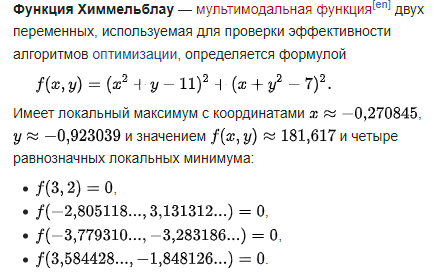

In [7]:
def fitness_Himmelblau(f):
  x = f[0]
  y = f[1]

  return (((x**2 + y - 11)**2) + (((x + y**2-7)**2)));

In [ ]:
s = CSO(fitness_Himmelblau, P = 150, n=2, pa=0.25, beta=1.2, bound=None, plot=True, min=True, verbose=True, Tmax=50)
s.execute()

Iteration:   0 | best global fitness (cost): 13.9385421
Iteration:   1 | best global fitness (cost): 6.3330968
Iteration:   2 | best global fitness (cost): 6.3330968
Iteration:   3 | best global fitness (cost): 6.3330968
Iteration:   4 | best global fitness (cost): 1.0885698
Iteration:   5 | best global fitness (cost): 1.0885698
Iteration:   6 | best global fitness (cost): 1.0885698
Iteration:   7 | best global fitness (cost): 1.0328973
Iteration:   8 | best global fitness (cost): 1.0328973
Iteration:   9 | best global fitness (cost): 1.0328973
Iteration:   10 | best global fitness (cost): 1.0328973
Iteration:   11 | best global fitness (cost): 0.9627527
Iteration:   12 | best global fitness (cost): 0.3432392
Iteration:   13 | best global fitness (cost): 0.3432392
Iteration:   14 | best global fitness (cost): 0.3432392
Iteration:   15 | best global fitness (cost): 0.3432392
Iteration:   16 | best global fitness (cost): 0.048099
Iteration:   17 | best global fitness (cost): 0.048099
Ite

Iteration:   49 | best global fitness (cost): 6.85e-05

OPTIMUM SOLUTION
  > [2.9997093, 2.0021377]

OPTIMUM FITNESS
  > 6.85e-05



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

 Эксперимент: нужно поварьировать _гиперпараметры_, число _итераций_ и опробовать разные _целевые функции_. 

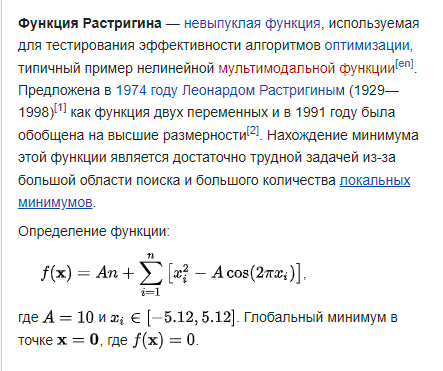

In [ ]:
def fitness_Rastrigin(X):
  A = 10
  return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

Iteration:   0 | best global fitness (cost): 0.0156373
Iteration:   1 | best global fitness (cost): 7.97e-05
Iteration:   2 | best global fitness (cost): 7.97e-05
Iteration:   3 | best global fitness (cost): 7.97e-05
Iteration:   4 | best global fitness (cost): 7.97e-05
Iteration:   5 | best global fitness (cost): 7.97e-05
Iteration:   6 | best global fitness (cost): 7.97e-05
Iteration:   7 | best global fitness (cost): 7.97e-05
Iteration:   8 | best global fitness (cost): 7.97e-05
Iteration:   9 | best global fitness (cost): 7.97e-05
Iteration:   10 | best global fitness (cost): 7.97e-05
Iteration:   11 | best global fitness (cost): 7.97e-05
Iteration:   12 | best global fitness (cost): 7.97e-05
Iteration:   13 | best global fitness (cost): 7.97e-05
Iteration:   14 | best global fitness (cost): 7.97e-05
Iteration:   15 | best global fitness (cost): 7.97e-05
Iteration:   16 | best global fitness (cost): 7.97e-05
Iteration:   17 | best global fitness (cost): 7.97e-05
Iteration:   18 | b

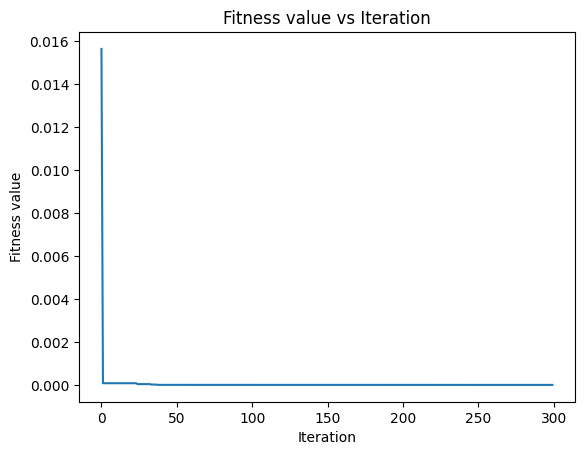

[-0.0]

In [ ]:
s = CSO(fitness_Rastrigin, P = 150, n=1, pa=0.25, beta=1.5, bound=None, plot=True, min=True, verbose=True, Tmax=300)
s.execute()

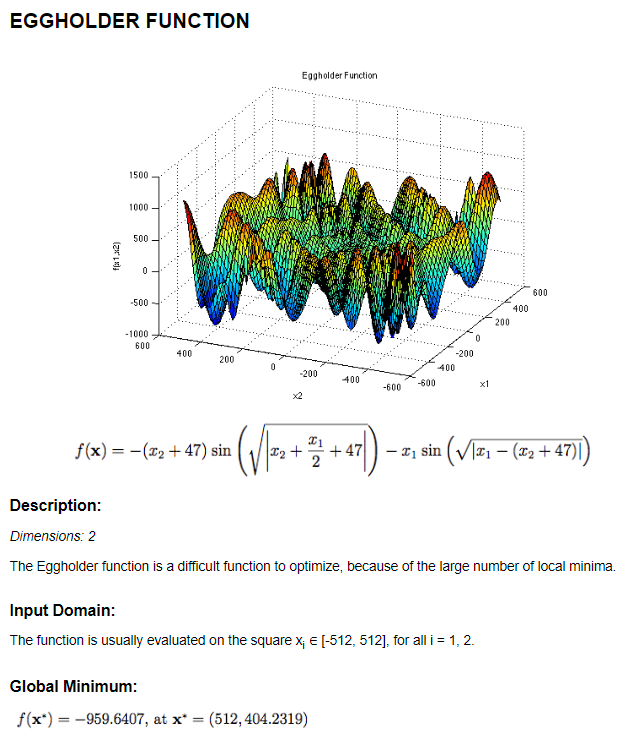

In [ ]:
def eggholder(f):
    x1 = f[0]
    x2 = f[1]

    a = math.sqrt(abs(x2+x1/2+47))
    b = math.sqrt(abs(x1-(x2+47)))
    c=-(x2+47)*math.sin(a)-x1*math.sin(b)
    return c

Iteration:   0 | best global fitness (cost): -36.3258445
Iteration:   1 | best global fitness (cost): -39.035174
Iteration:   2 | best global fitness (cost): -41.5385412
Iteration:   3 | best global fitness (cost): -41.5385412
Iteration:   4 | best global fitness (cost): -41.5385412
Iteration:   5 | best global fitness (cost): -46.6556719
Iteration:   6 | best global fitness (cost): -46.6556719
Iteration:   7 | best global fitness (cost): -46.6556719
Iteration:   8 | best global fitness (cost): -46.6556719
Iteration:   9 | best global fitness (cost): -46.6556719
Iteration:   10 | best global fitness (cost): -46.7849247
Iteration:   11 | best global fitness (cost): -46.7849247
Iteration:   12 | best global fitness (cost): -50.5147572
Iteration:   13 | best global fitness (cost): -52.0777069
Iteration:   14 | best global fitness (cost): -52.0777069
Iteration:   15 | best global fitness (cost): -52.0777069
Iteration:   16 | best global fitness (cost): -52.1896992
Iteration:   17 | best gl

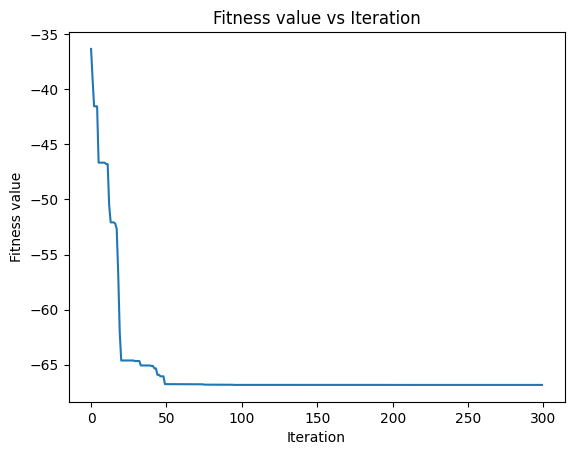

[8.4569087, 15.6511373]

In [ ]:

s = CSO(eggholder, P = 150, n=2, pa=0.25, beta=1.5, bound=None, plot=True, min=True, verbose=True, Tmax=300)
s.execute()

## Pytest

In [ ]:
import unittest
import numpy as np
from main import CSO

def fitness_himmelblau(coords):
    x = coords[0]
    y = coords[1]

    return (((x**2 + y - 11)**2) + (((x + y**2-7)**2)))


def test_function(fitness_function, expected_results):
    s = CSO(fitness_function, P=150, n=2, pa=0.25, beta=1.5, bound=None,
                        plot=True, min=True, verbose=True, Tmax=300,)
    optimal_coords = s.execute()

    flag = False

    compare_function = lambda d: d < 0.001
    compare_function = np.vectorize(compare_function)

    for expected_result in expected_results:
        print(f'comparing {expected_result} and {optimal_coords}')

        if np.any(compare_function(np.abs(optimal_coords - expected_result))):
            flag = True
            break

    assert flag == True

class TestCSO(unittest.TestCase):
    def test_himmelblau(self):
        test_function(
            fitness_function=fitness_himmelblau,
            expected_results=[
                np.array([-2.805118, 3.131312]),
                np.array([-3.779310, -3.283186]),
                np.array([3.584428, -1.848126])
            ],
        )


if __name__ == '__main__':
    unittest.main()
